In [ ]:
# import required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Preparing the dataset
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(Y_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


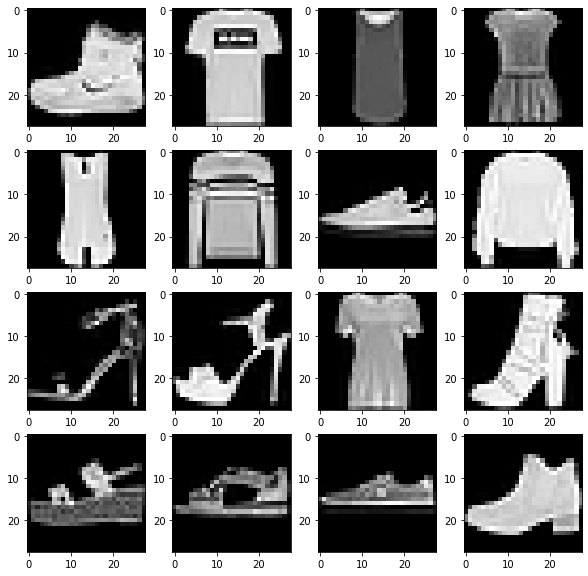

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(16):
    plt.subplot(4,4,i+1)    
    plt.imshow(X_train[i], cmap='gray')

plt.show()

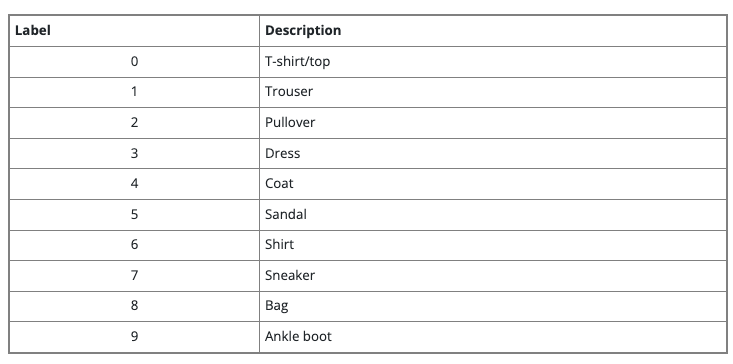

In [ ]:
Y_train[0]

9

In [ ]:
# Reshape and Scale images to the [0, 1] range
x_train = X_train.reshape(-1, 28*28).astype("float32") / 255
x_test = X_test.reshape(-1, 28*28).astype("float32") / 255
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### **Build the model**

In [ ]:
# Sequential model

model = keras.Sequential(
    [
     keras.Input(shape=(784,)),
     layers.Dense(512, activation='relu'),
     layers.Dense(256, activation='relu'),
     layers.Dense(128, activation='relu'),
     layers.Dense(10, activation='softmax'),   
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


### **Train the model**

In [ ]:
batch_size = 64
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-5), metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 8s 11ms/step - loss: 0.4978 - accuracy: 0.8201 - val_loss: 0.4390 - val_accuracy: 0.8391
Epoch 2/20
750/750 [==============================] - 7s 10ms/step - loss: 0.3681 - accuracy: 0.8620 - val_loss: 0.3527 - val_accuracy: 0.8708
Epoch 3/20
750/750 [==============================] - 7s 9ms/step - loss: 0.3308 - accuracy: 0.8776 - val_loss: 0.3302 - val_accuracy: 0.8797
Epoch 4/20
750/750 [==============================] - 8s 10ms/step - loss: 0.3063 - accuracy: 0.8861 - val_loss: 0.3443 - val_accuracy: 0.8758
Epoch 5/20
750/750 [==============================] - 7s 10ms/step - loss: 0.2881 - accuracy: 0.8927 - val_loss: 0.3217 - val_accuracy: 0.8851
Epoch 6/20
750/750 [==============================] - 7s 10ms/step - loss: 0.2686 - accuracy: 0.9003 - val_loss: 0.3625 - val_accuracy: 0.8658
Epoch 7/20
750/750 [==============================] - 8s 11ms/step - loss: 0.2541 - accuracy: 0.9035 - val_loss: 0.3272 - val_accuracy: 0.8811


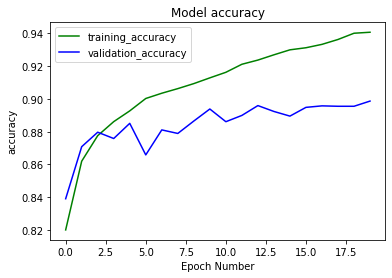

In [ ]:
plt.title('Model accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'],'g',label = 'training_accuracy')
plt.plot(history.history['val_accuracy'],'b', label = 'validation_accuracy')
plt.legend()

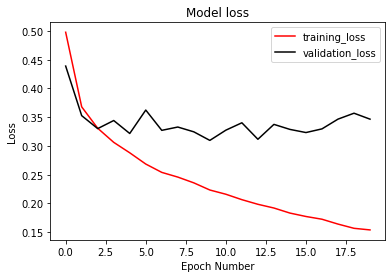

In [ ]:
plt.title('Model loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'],'r',label = 'training_loss')
plt.plot(history.history['val_loss'],'k', label = 'validation_loss')
plt.legend()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3966 - accuracy: 0.8898


[0.3965749144554138, 0.8898000121116638]

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred[0]

array([9.2694094e-08, 3.7445420e-07, 3.5071201e-09, 5.9463795e-11,
       1.4862833e-09, 1.5150986e-04, 3.7065682e-09, 5.4105284e-04,
       2.8492667e-10, 9.9930692e-01], dtype=float32)

In [ ]:
round_pred = np.argmax(y_pred, axis=-1)

In [ ]:
round_pred[0]

9

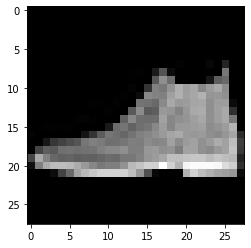

In [ ]:
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=Y_test, y_pred=round_pred)

In [ ]:
cm_plot_labels = ['T-shirt/top','Trouser',
                  'Pullover', 'Dress',
                  'Coat', 'Sandal',
                  'Shirt', 'Sneaker',
                  'Bag', 'Ankle boot']

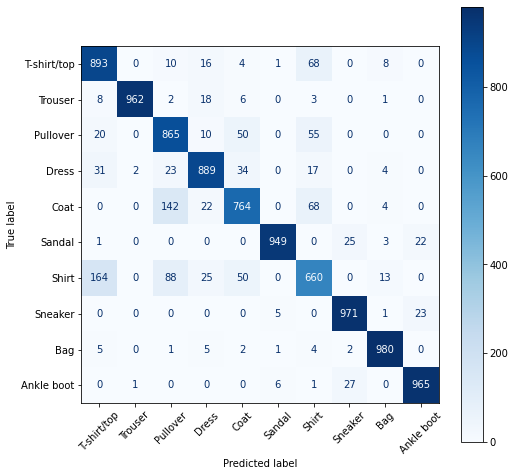

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45)
plt.show()